In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos con descripciones completas
div_df = pd.read_csv('div_full.csv')
mat_df = pd.read_csv('mat_full.csv')

print("Forma de div_df:", div_df.shape)
print("Forma de mat_df:", mat_df.shape)
print("\nColumnas en div_df:")
print(div_df.columns.tolist())
print("\nColumnas en mat_df:")
print(mat_df.columns.tolist())

# Mostrar información general
print("\nInformación sobre div_df:")
print(div_df.info())
print("\nInformación sobre mat_df:")
print(mat_df.info())

C:\Users\gabri\AppData\Local\Temp\ipykernel_11872\1499559292.py:8: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  mat_df = pd.read_csv('mat_full.csv')


Forma de div_df: (56349, 12)
Forma de mat_df: (752264, 15)

Columnas en div_df:
['AÑOREG', 'DEPOCU', 'DEPREG', 'DIAOCU', 'EDADHOM', 'EDADMUJ', 'MESOCU', 'MESREG', 'MUPOCU', 'MUPREG', 'NACHOM', 'NACMUJ']

Columnas en mat_df:
['AÑOREG', 'CLAUNI', 'DEPOCU', 'DEPREG', 'DIAOCU', 'EDADHOM', 'EDADMUJ', 'ESCHOM', 'ESCMUJ', 'MESOCU', 'MESREG', 'MUPOCU', 'MUPREG', 'NACHOM', 'NACMUJ']

Información sobre div_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56349 entries, 0 to 56348
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AÑOREG   56349 non-null  float64
 1   DEPOCU   56349 non-null  object 
 2   DEPREG   56349 non-null  object 
 3   DIAOCU   56349 non-null  float64
 4   EDADHOM  56349 non-null  object 
 5   EDADMUJ  56349 non-null  object 
 6   MESOCU   56349 non-null  object 
 7   MESREG   56349 non-null  object 
 8   MUPOCU   56349 non-null  object 
 9   MUPREG   56349 non-null  object 
 10  NACHOM   56349 non-null  o

In [4]:
def convertir_categoricas_a_numericas(df):
    """
    Convierte todas las variables categóricas a numéricas manteniendo la estructura
    """
    df_procesado = df.copy()
    
    # Identificar columnas categóricas (solo strings, no mezclar con float/int)
    columnas_categoricas = df_procesado.select_dtypes(include=['object']).columns
    
    print(f"Columnas categóricas encontradas: {list(columnas_categoricas)}")
    
    # Diccionario para guardar los mapeos (útil para interpretación posterior)
    mapeos = {}
    
    for col in columnas_categoricas:
        if col in df_procesado.columns:
            # Obtener valores únicos, excluyendo NaN
            valores_unicos_lista = df_procesado[col].dropna().unique()
            # Convertir a string para evitar problemas de comparación entre tipos
            valores_unicos_str = [str(val) for val in valores_unicos_lista]
            valores_unicos_ordenados = sorted(set(valores_unicos_str))
            
            mapeo = {valor: idx for idx, valor in enumerate(valores_unicos_ordenados)}
            mapeos[col] = mapeo
            
            # Aplicar el mapeo convirtiendo valores a string primero
            df_procesado[col] = df_procesado[col].apply(
                lambda x: mapeo[str(x)] if pd.notna(x) else np.nan
            )
            
            print(f"Columna '{col}' - Valores únicos: {len(valores_unicos_ordenados)}, "
                  f"Rango de codificación: 0-{len(valores_unicos_ordenados)-1}")
    
    return df_procesado, mapeos

# Aplicar conversión a ambos datasets
div_df_num, div_mapeos = convertir_categoricas_a_numericas(div_df)
mat_df_num, mat_mapeos = convertir_categoricas_a_numericas(mat_df)

print("\nMuestra después de conversión - div_df:")
print(div_df_num.head())
print("\nMuestra después de conversión - mat_df:")
print(mat_df_num.head())

Columnas categóricas encontradas: ['DEPOCU', 'DEPREG', 'EDADHOM', 'EDADMUJ', 'MESOCU', 'MESREG', 'MUPOCU', 'MUPREG', 'NACHOM', 'NACMUJ']
Columna 'DEPOCU' - Valores únicos: 28, Rango de codificación: 0-27
Columna 'DEPREG' - Valores únicos: 28, Rango de codificación: 0-27
Columna 'EDADHOM' - Valores únicos: 77, Rango de codificación: 0-76
Columna 'EDADMUJ' - Valores únicos: 67, Rango de codificación: 0-66
Columna 'MESOCU' - Valores únicos: 12, Rango de codificación: 0-11
Columna 'MESREG' - Valores únicos: 12, Rango de codificación: 0-11
Columna 'MUPOCU' - Valores únicos: 331, Rango de codificación: 0-330
Columna 'MUPREG' - Valores únicos: 331, Rango de codificación: 0-330
Columna 'NACHOM' - Valores únicos: 72, Rango de codificación: 0-71
Columna 'NACMUJ' - Valores únicos: 55, Rango de codificación: 0-54
Columnas categóricas encontradas: ['CLAUNI', 'DEPOCU', 'DEPREG', 'EDADHOM', 'EDADMUJ', 'ESCHOM', 'ESCMUJ', 'MESOCU', 'MESREG', 'MUPOCU', 'MUPREG', 'NACHOM', 'NACMUJ']
Columna 'CLAUNI' - V

In [5]:
def limpiar_y_validar_datos(df):
    """
    Limpia los datos y asegura que sean aptos para análisis numéricos
    """
    df_clean = df.copy()
    
    # Reemplazar valores especiales comunes en tus datasets
    valores_especiales = ['Ignorado', 'No especificado', 'Sin dato']
    for valor in valores_especiales:
        df_clean = df_clean.replace(valor, np.nan)
    
    # Convertir todas las columnas a numérico, forzando errores a NaN
    for col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # Verificar si hay valores infinitos y reemplazarlos
    df_clean = df_clean.replace([np.inf, -np.inf], np.nan)
    
    # Reporte de limpieza
    print(f"Valores nulos antes de llenado: {df_clean.isnull().sum().sum()}")
    
    # Opcional: estrategia de imputación (puedes ajustar según necesidad)
    # Para mantener consistencia con tu análisis anterior, usamos la mediana
    for col in df_clean.columns:
        if df_clean[col].isna().any():
            mediana = df_clean[col].median()
            df_clean[col].fillna(mediana, inplace=True)
    
    print(f"Valores nulos después de llenado: {df_clean.isnull().sum().sum()}")
    print(f"Forma final: {df_clean.shape}")
    
    return df_clean

# Limpiar ambos datasets
div_clean = limpiar_y_validar_datos(div_df_num)
mat_clean = limpiar_y_validar_datos(mat_df_num)

Valores nulos antes de llenado: 0
Valores nulos después de llenado: 0
Forma final: (56349, 12)
Valores nulos antes de llenado: 0
Valores nulos después de llenado: 0
Forma final: (752264, 15)



Correlaciones - Divorcios


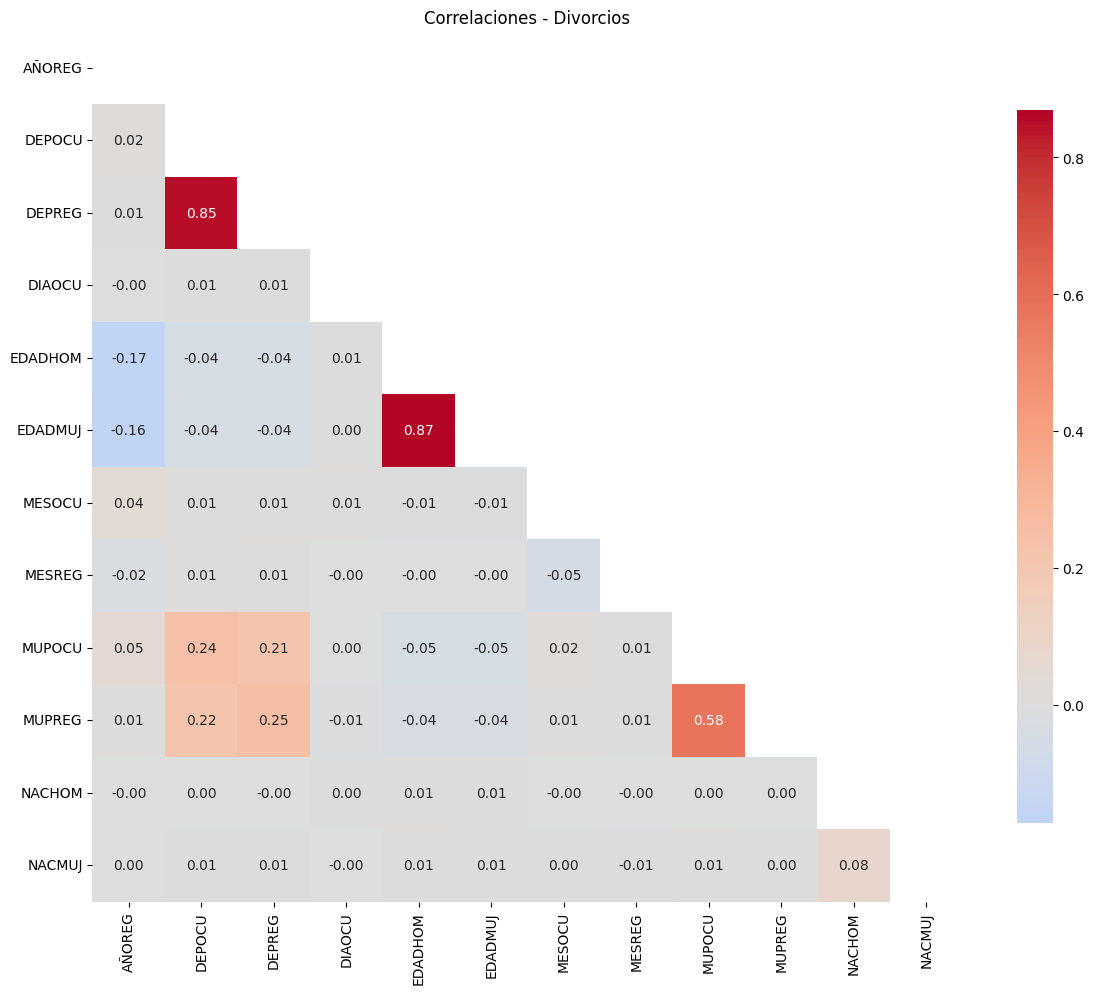


Correlaciones - Matrimonios


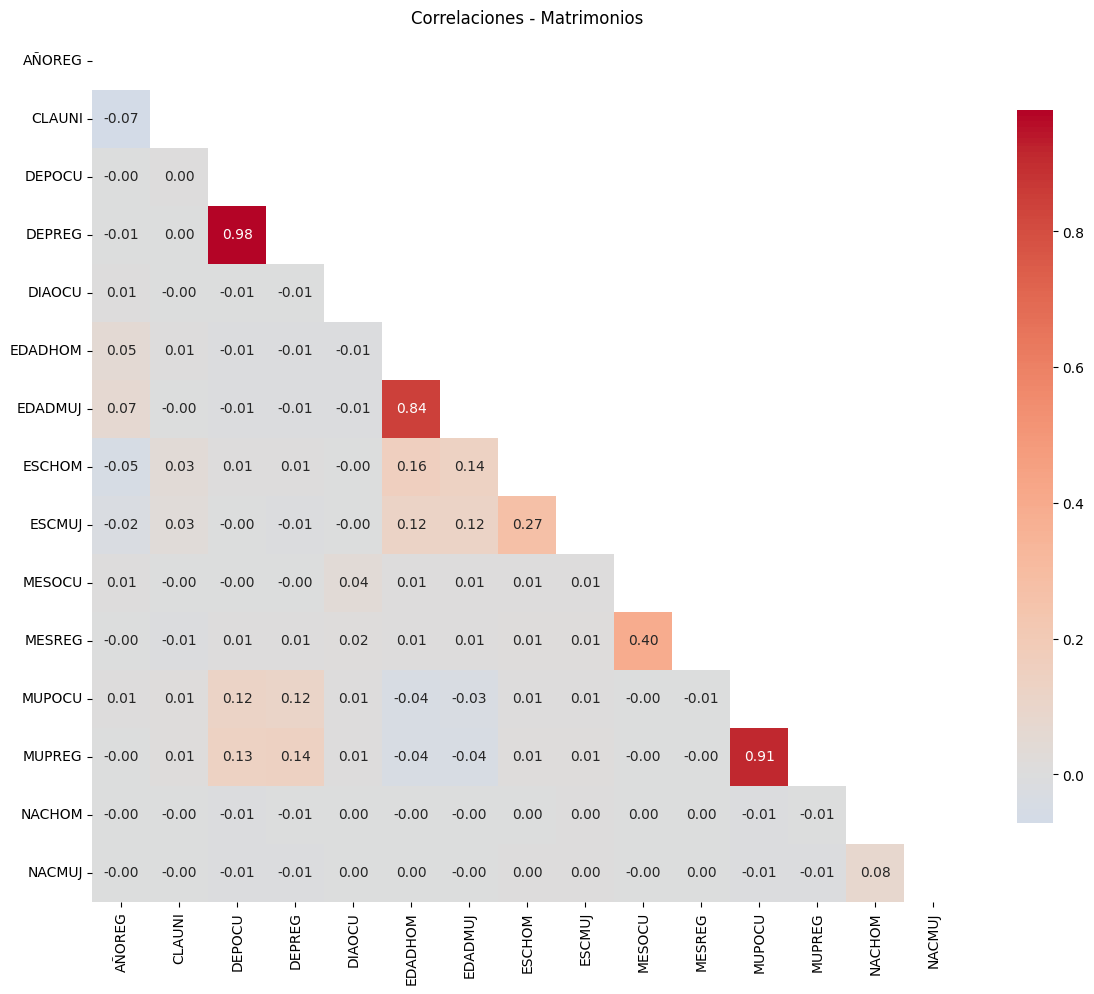

In [6]:
def analizar_correlaciones(df, titulo="Análisis de Correlaciones"):
    """
    Realiza análisis de correlaciones similar al que harías con los datasets antiguos
    """
    print(f"\n{titulo}")
    
    # Calcular matriz de correlación
    corr_matrix = df.corr()
    
    # Visualizar matriz de correlación
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', cbar_kws={"shrink": .8})
    plt.title(titulo)
    plt.tight_layout()
    plt.show()
    
    return corr_matrix

# Aplicar análisis de correlaciones
corr_div = analizar_correlaciones(div_clean, "Correlaciones - Divorcios")
corr_mat = analizar_correlaciones(mat_clean, "Correlaciones - Matrimonios")


=== ANÁLISIS DESCRIPTIVO - DIVORCIOS ===

Estadísticas Descriptivas:
             AÑOREG        DEPOCU        DEPREG        DIAOCU       EDADHOM  \
count  56349.000000  56349.000000  56349.000000  56349.000000  56349.000000   
mean    2015.934657      9.769845      9.640916     15.748549     50.471082   
std        2.808174      6.564285      6.469797      8.696303     28.937945   
min     2011.000000      0.000000      0.000000      1.000000      0.000000   
25%     2014.000000      6.000000      6.000000      8.000000     18.000000   
50%     2016.000000      6.000000      6.000000     16.000000     76.000000   
75%     2018.000000     13.000000     13.000000     23.000000     76.000000   
max     2021.000000     27.000000     27.000000     31.000000     76.000000   

            EDADMUJ        MESOCU        MESREG        MUPOCU        MUPREG  \
count  56349.000000  56349.000000  56349.000000  56349.000000  56349.000000   
mean      44.282685      5.627536      5.649044    128.52462

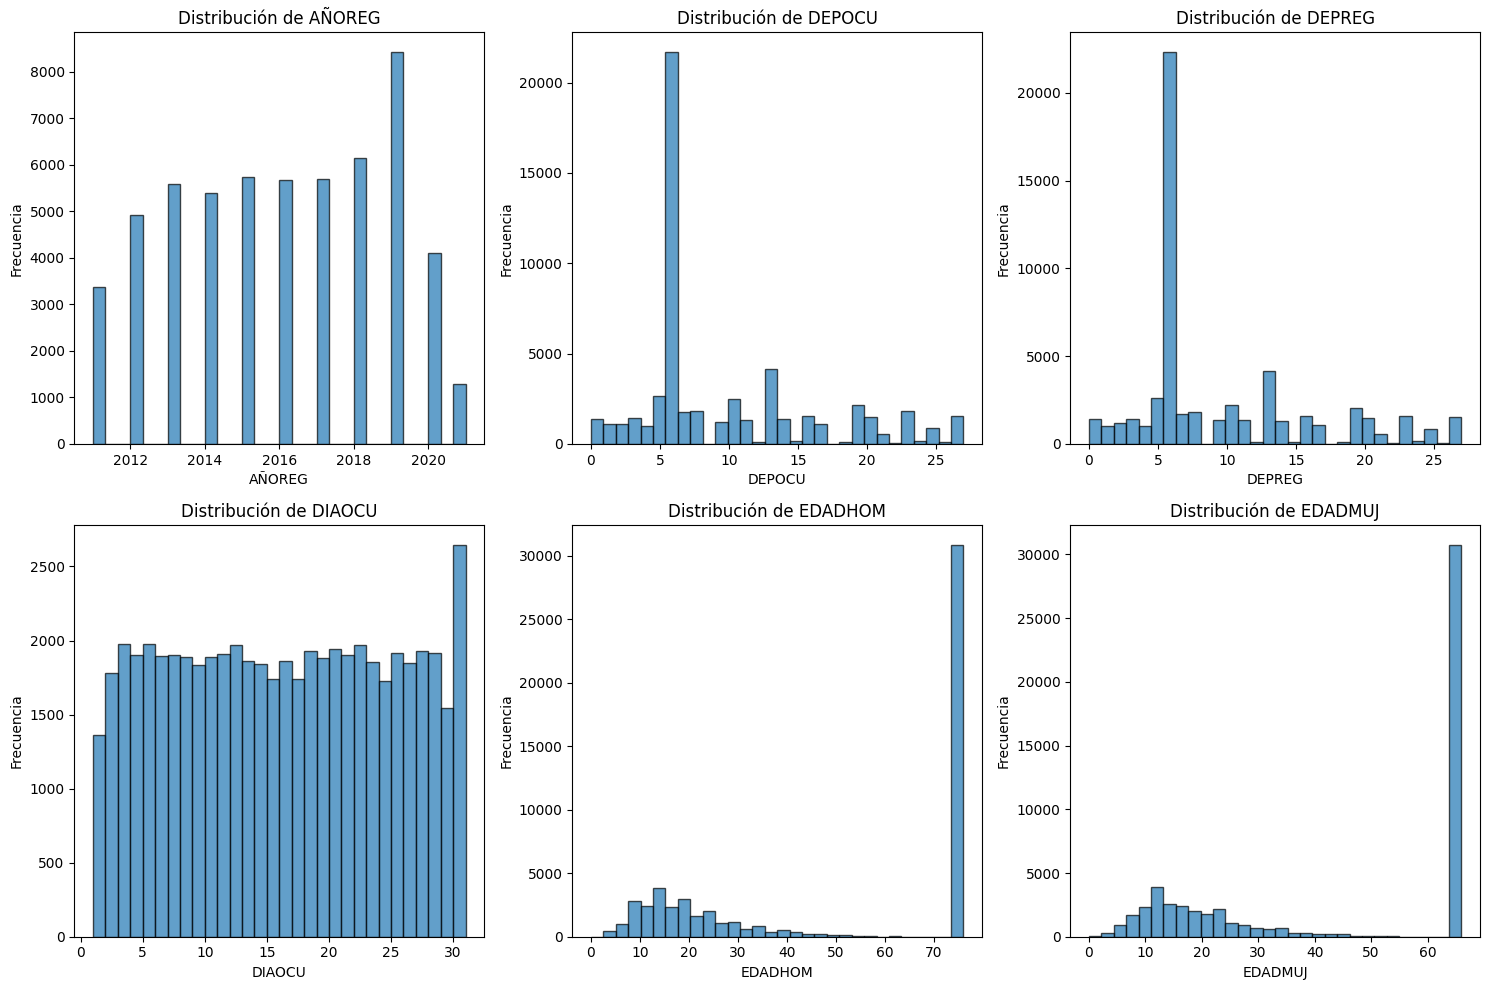


=== ANÁLISIS DESCRIPTIVO - MATRIMONIOS ===

Estadísticas Descriptivas:
              AÑOREG         CLAUNI         DEPOCU         DEPREG  \
count  752264.000000  752264.000000  752264.000000  752264.000000   
mean     2015.404325       1.022495      10.512310      10.471450   
std         2.844226       0.418377       7.329454       7.315772   
min      2011.000000       0.000000       0.000000       0.000000   
25%      2013.000000       1.000000       6.000000       6.000000   
50%      2015.000000       1.000000       7.000000       7.000000   
75%      2018.000000       1.000000      16.000000      16.000000   
max      2021.000000       3.000000      27.000000      27.000000   

              DIAOCU        EDADHOM        EDADMUJ         ESCHOM  \
count  752264.000000  752264.000000  752264.000000  752264.000000   
mean       16.034647      16.392255      16.398183       3.875695   
std         8.645327      11.405934      10.098843       2.786994   
min         1.000000       0.0

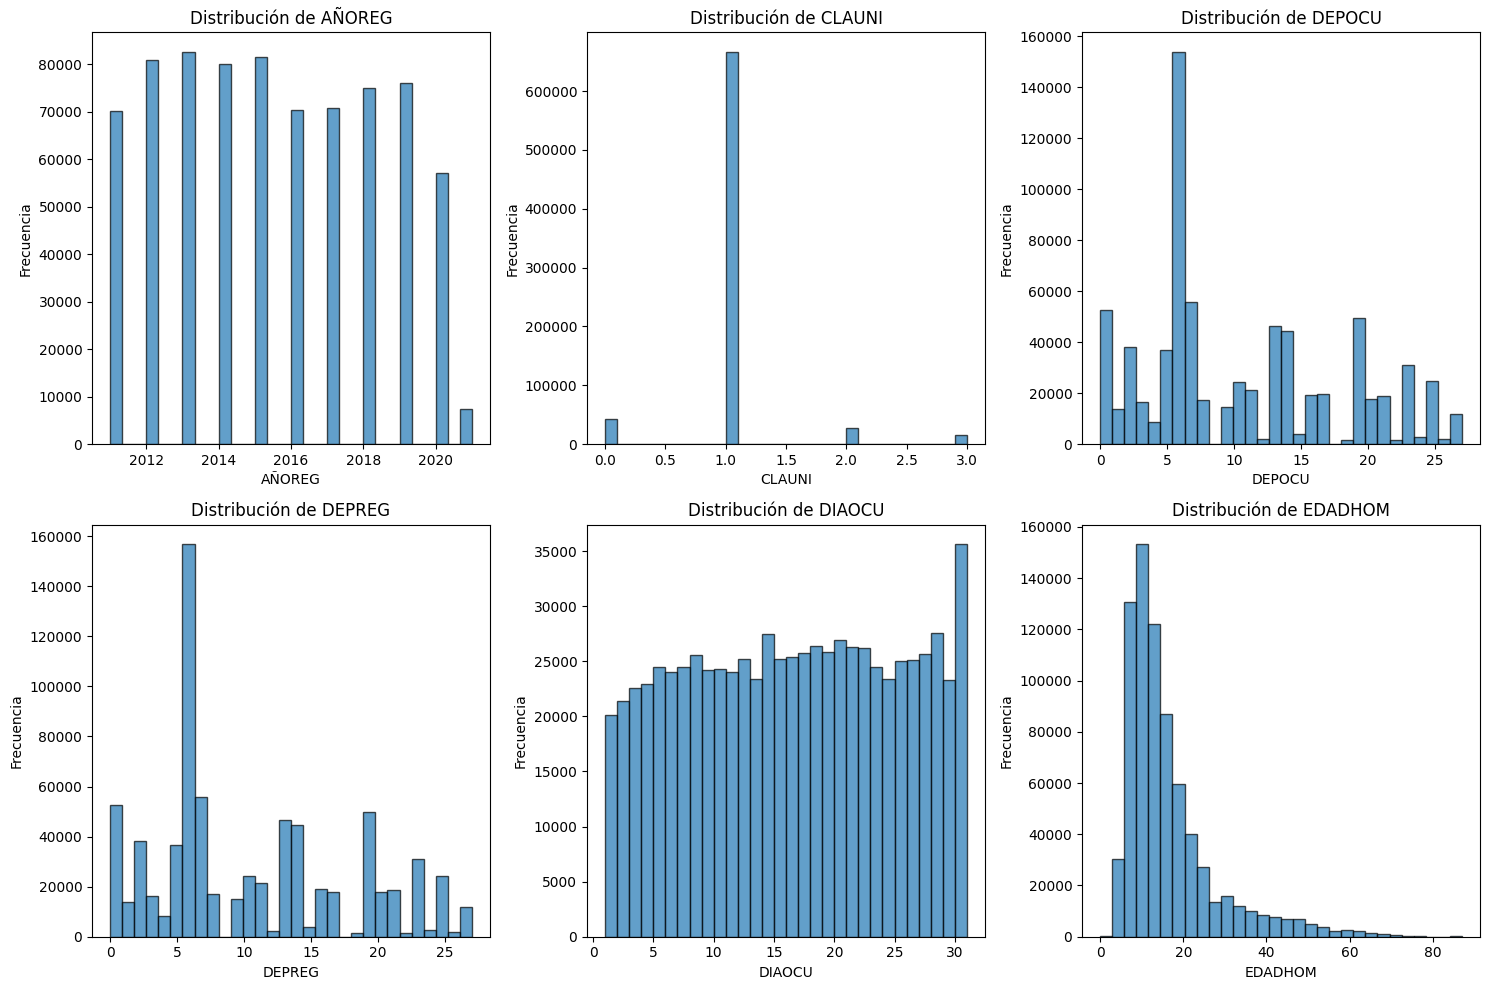

In [7]:
def analisis_descriptivo_completo(df, nombre_dataset):
    """
    Realiza análisis descriptivo completo compatible con tu flujo de trabajo anterior
    """
    print(f"\n=== ANÁLISIS DESCRIPTIVO - {nombre_dataset} ===")
    
    # Estadísticas descriptivas
    print("\nEstadísticas Descriptivas:")
    print(df.describe())
    
    # Distribución de valores por columna
    print(f"\nDistribución de valores por columna ({nombre_dataset}):")
    for col in df.columns[:5]:  # Mostrar las primeras 5 columnas como ejemplo
        print(f"\n{col}:")
        print(df[col].value_counts().head(10))  # Top 10 valores más comunes
    
    # Histogramas para las primeras columnas numéricas
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, col in enumerate(df.columns[:6]):  # Primeras 6 columnas
        if i < len(axes):
            axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
            axes[i].set_title(f'Distribución de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()

# Aplicar análisis descriptivo
analisis_descriptivo_completo(div_clean, "DIVORCIOS")
analisis_descriptivo_completo(mat_clean, "MATRIMONIOS")

In [8]:
def exportar_datos_procesados(df, nombre_archivo_salida):
    """
    Exporta los datos procesados manteniendo formato compatible
    """
    df.to_csv(nombre_archivo_salida, index=False, sep=',')
    print(f"Datos exportados a: {nombre_archivo_salida}")

def obtener_valores_originales_por_columna(nombre_columna, mapeo_original):
    """
    Obtiene el mapeo inverso para interpretar resultados
    """
    if nombre_columna in mapeo_original:
        mapeo_inverso = {v: k for k, v in mapeo_original[nombre_columna].items()}
        print(f"Mapeo inverso para '{nombre_columna}':")
        for num, texto in mapeo_inverso.items():
            print(f"  {num} -> {texto}")
    else:
        print(f"No se encontró mapeo para la columna '{nombre_columna}'")

# Ejemplo de uso para interpretar resultados
print("\nEjemplo de mapeo inverso para algunas columnas de divorcios:")
if 'DEPOCU' in div_mapeos:
    obtener_valores_originales_por_columna('DEPOCU', div_mapeos)

print("\nEjemplo de mapeo inverso para algunas columnas de matrimonios:")
if 'DEPOCU' in mat_mapeos:
    obtener_valores_originales_por_columna('DEPOCU', mat_mapeos)


Ejemplo de mapeo inverso para algunas columnas de divorcios:
Mapeo inverso para 'DEPOCU':
  0 -> Alta Verapaz
  1 -> Baja Verapaz
  2 -> Chimaltenango
  3 -> Chiquimula
  4 -> El Progreso
  5 -> Escuintla
  6 -> Guatemala
  7 -> Huehuetenango
  8 -> Izabal
  9 -> Jalapa
  10 -> Jutiapa
  11 -> Peten
  12 -> Petén
  13 -> Quetzaltenango
  14 -> Quiche
  15 -> Quiché
  16 -> Retalhuleu
  17 -> Sacatepequez
  18 -> Sacatepéquez
  19 -> San Marcos
  20 -> Santa Rosa
  21 -> Solola
  22 -> Sololá
  23 -> Suchitepequez
  24 -> Suchitepéquez
  25 -> Totonicapan
  26 -> Totonicapán
  27 -> Zacapa

Ejemplo de mapeo inverso para algunas columnas de matrimonios:
Mapeo inverso para 'DEPOCU':
  0 -> Alta Verapaz
  1 -> Baja Verapaz
  2 -> Chimaltenango
  3 -> Chiquimula
  4 -> El Progreso
  5 -> Escuintla
  6 -> Guatemala
  7 -> Huehuetenango
  8 -> Izabal
  9 -> Jalapa
  10 -> Jutiapa
  11 -> Peten
  12 -> Petén
  13 -> Quetzaltenango
  14 -> Quiche
  15 -> Quiché
  16 -> Retalhuleu
  17 -> Sacat

In [ ]:
def validar_compatibilidad_con_codigo_anterior(df):
    """
    Valida que los datos estén listos para usar con tu código anterior
    """
    print("\n=== VALIDACIÓN DE COMPATIBILIDAD ===")
    print(f"- Formato: {df.shape}")
    print(f"- Tipos de datos: {df.dtypes.unique()}")
    print(f"- Valores nulos: {df.isnull().sum().sum()}")
    print(f"- Valores infinitos: {np.isinf(df.select_dtypes(include=[np.number])).sum().sum()}")
    print(f"- Todo numérico: {all(df.dtypes.apply(lambda x: np.issubdtype(x, np.number)))}")
    
    if df.isnull().sum().sum() == 0 and all(df.dtypes.apply(lambda x: np.issubdtype(x, np.number))):
        print("✓ Dataset completamente compatible con código anterior")
    else:
        print("⚠ Requiere limpieza adicional antes de usar con código anterior")

# Validar ambos datasets
validar_compatibilidad_con_codigo_anterior(div_clean)
validar_compatibilidad_con_codigo_anterior(mat_clean)


=== VALIDACIÓN DE COMPATIBILIDAD ===
- Formato: (56349, 12)
- Tipos de datos: [dtype('float64') dtype('int64')]
- Valores nulos: 0
- Valores infinitos: 0
- Todo numérico: True
✓ Dataset completamente compatible con código anterior

=== VALIDACIÓN DE COMPATIBILIDAD ===
- Formato: (752264, 15)
- Tipos de datos: [dtype('float64') dtype('int64')]
- Valores nulos: 0
- Valores infinitos: 0
- Todo numérico: True
✓ Dataset completamente compatible con código anterior
Datos exportados a: div_full_procesado.csv
Datos exportados a: mat_full_procesado.csv

¡Listo! Ahora puedes usar div_clean y mat_clean con tu código anterior.
